Null Hypothesis- There is no difference in the provicial examination grades in Public or independent highschools in BC
Alternate Hypthesis- In BC, Independent highschools has higher provicial examination grades than Public highschools.

In [1]:
library(tidyverse)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.2”


In [2]:
exam_data <- read_delim("https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv", delim = ",")
exam_test<-exam_data %>% 
select(PUBLIC_OR_INDEPENDENT) %>% 
group_by(PUBLIC_OR_INDEPENDENT) %>% 
            summarize(n=n())

exam_test

Parsed with column specification:
cols(
  .default = col_character(),
  SCHOOL_NUMBER = col_logical(),
  SCHOOL_NAME = col_logical(),
  GRADE = col_double()
)

See spec(...) for full column specifications.

Warning message:
“81714 parsing failures.
 row           col           expected                actual                                                                                                                                     file
2314 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2314 SCHOOL_NAME   1/0/T/F/TRUE/FALSE Mount Baker Secondary 'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2315 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-exam

PUBLIC_OR_INDEPENDENT,n
<chr>,<int>
BC Independent School,7377
BC Public School,41316
Province-Total,225


In [4]:
exam_school_type <- exam_data  %>% 
                    select(PUBLIC_OR_INDEPENDENT, AVERAGE_PERCENT) %>% 
                    filter(AVERAGE_PERCENT != "Msk") %>% 
                    filter(PUBLIC_OR_INDEPENDENT == "BC Public School" |PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% 
                    mutate(AVERAGE_PERCENT = as.numeric(AVERAGE_PERCENT))
head(exam_school_type)

PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT
<chr>,<dbl>
BC Public School,60.8
BC Public School,68.4
BC Public School,73.4
BC Public School,64.2
BC Public School,70.5
BC Public School,54.8


In [5]:
set.seed(122)
exam_school_type_sample_public <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Public School") %>% 
        rep_sample_n(size = 20) 

exam_school_type_sample_Independent <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% 
        rep_sample_n(size = 20) 

exam_school_type_sample <- rbind(exam_school_type_sample_public, exam_school_type_sample_Independent) %>% 
                        ungroup() %>% 
                        select(-replicate)
head(exam_school_type_sample)

PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT
<chr>,<dbl>
BC Public School,74.9
BC Public School,67.9
BC Public School,77.2
BC Public School,74.6
BC Public School,74.3
BC Public School,64.5


In [6]:
obs_diff_in_mean <-   exam_school_type_sample  %>% 
    specify(formula = AVERAGE_PERCENT ~ PUBLIC_OR_INDEPENDENT) %>%
    calculate(stat = "diff in means", order = c("BC Independent School", "BC Public School"))
obs_diff_in_mean 

stat
<dbl>
6.09


In [7]:
null_distribution <- exam_school_type_sample %>% 
  specify(formula = AVERAGE_PERCENT ~ PUBLIC_OR_INDEPENDENT) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in means", order = c("BC Independent School", "BC Public School"))
head(null_distribution)

replicate,stat
<int>,<dbl>
1,-0.59
2,0.28
3,-0.77
4,-2.44
5,0.19
6,0.17


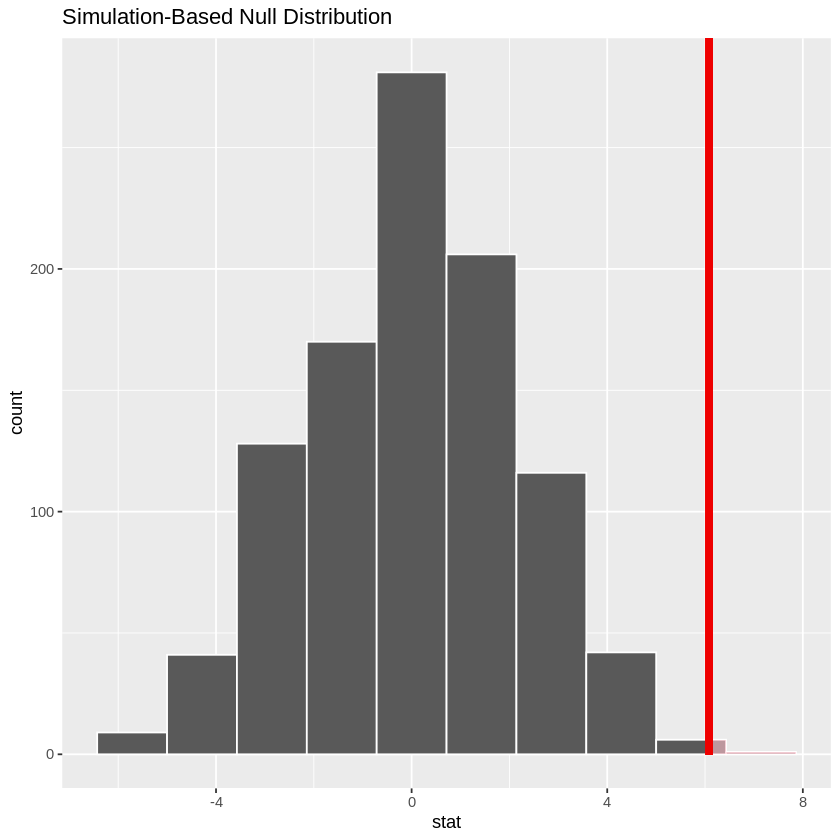

In [8]:
visualize(null_distribution, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_in_mean, direction = "right")

In [9]:
null_distribution %>% 
  get_p_value(obs_stat = obs_diff_in_mean, direction = "right")

p_value
<dbl>
0.002


At a significance level of 0.05, we reject the null hypthothesis.